In [32]:
import numpy as np
import pandas as pd

# Cargar los datos originales
train_data = pd.read_csv('mnist_trainnuevo.csv')
test_data = pd.read_csv('mnist_test.csv')

# Imprimir información antes de la separación y el reshape
print("Datos originales:")
print("Forma de x_train antes del reshape:", train_data.iloc[:, 1:].shape)
print("Forma de x_test antes del reshape:", test_data.iloc[:, 1:].shape)

# Separar características y etiquetas
x_train = train_data.iloc[:, 1:].values / 255.0
y_train = train_data['label'].values
x_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data['label'].values

# Imprimir información después de la separación
print("\nDatos después de la separación:")
print("Forma de x_train después del reshape:", x_train.shape)
print("Forma de x_test después del reshape:", x_test.shape)

# Reshape de las imágenes a 28x28
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

# Imprimir información después del reshape
print("\nDatos después del reshape a 28x28:")
print("Forma de x_train después del reshape:", x_train.shape)
print("Forma de x_test después del reshape:", x_test.shape)

# Crear DataFrames para las mitades izquierda y derecha con relleno horizontal
left_with_padding = []
right_with_padding = []

for image in x_train:
    mid = image.shape[1] // 2  # Calcular el punto medio horizontal
    sample_left = image[:, :mid]  # Mitad izquierda
    sample_right = image[:, mid:]  # Mitad derecha
    
    # Rellenar la parte izquierda con la parte derecha para que sean de 28x28
    sample_left_28x28 = np.pad(sample_left, ((0, 0), (0, mid)), mode='constant', constant_values=0)
    sample_right_28x28 = np.pad(sample_right, ((0, 0), (mid, 0)), mode='constant', constant_values=0)
    
    left_with_padding.append(sample_left_28x28.flatten())
    right_with_padding.append(sample_right_28x28.flatten())

    # Imprimir algunas muestras para verificar
    if len(left_with_padding) % 1000 == 0:
        print(f"Procesadas {len(left_with_padding)} muestras.")

# Convertir a DataFrames
left_df = pd.DataFrame(data=left_with_padding)
right_df = pd.DataFrame(data=right_with_padding)

# Agregar etiquetas de región a los DataFrames


# Agregar las etiquetas originales a los DataFrames
#left_df['label'] = y_train
#right_df['label'] = y_train
# Agregar etiquetas de región a los DataFrames
left_df['lado'] = 1  # Etiqueta de región 1 para la mitad izquierda
right_df['lado'] = 2  # Etiqueta de región 2 para la mitad derecha

# Guardar los DataFrames en archivos CSV
left_df.to_csv('mnist_izquierdageneral.csv', index=False)
right_df.to_csv('mnist_derechageneral.csv', index=False)


Datos originales:
Forma de x_train antes del reshape: (30000, 784)
Forma de x_test antes del reshape: (10000, 784)

Datos después de la separación:
Forma de x_train después del reshape: (30000, 784)
Forma de x_test después del reshape: (10000, 784)

Datos después del reshape a 28x28:
Forma de x_train después del reshape: (30000, 28, 28)
Forma de x_test después del reshape: (10000, 28, 28)
Procesadas 1000 muestras.
Procesadas 2000 muestras.
Procesadas 3000 muestras.
Procesadas 4000 muestras.
Procesadas 5000 muestras.
Procesadas 6000 muestras.
Procesadas 7000 muestras.
Procesadas 8000 muestras.
Procesadas 9000 muestras.
Procesadas 10000 muestras.
Procesadas 11000 muestras.
Procesadas 12000 muestras.
Procesadas 13000 muestras.
Procesadas 14000 muestras.
Procesadas 15000 muestras.
Procesadas 16000 muestras.
Procesadas 17000 muestras.
Procesadas 18000 muestras.
Procesadas 19000 muestras.
Procesadas 20000 muestras.
Procesadas 21000 muestras.
Procesadas 22000 muestras.
Procesadas 23000 muestr

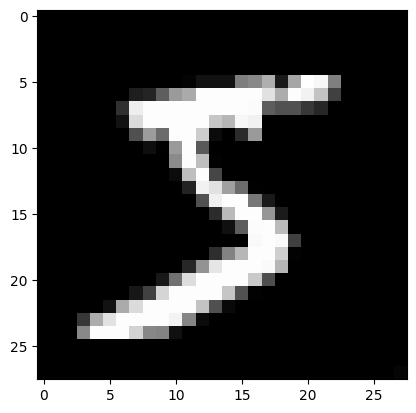

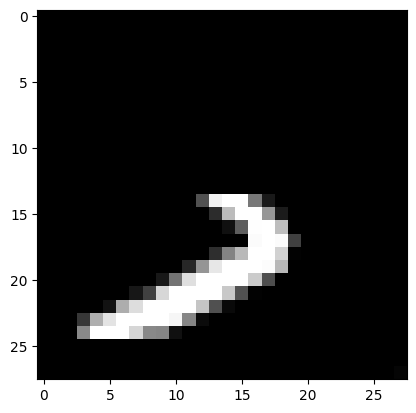

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a function to display images
def display_image(image):
    # Replace this with your actual code to display images
    plt.imshow(image, cmap='gray')
    plt.show()

# Leer el archivo CSV
matriz_28x28 = pd.read_csv("mnist_trainnuevo.csv")

# Extraer la columna 'label'
labels = matriz_28x28['label']

# Convertir el DataFrame a un array NumPy, excluyendo la columna 'label'
matriz_28x28_values = matriz_28x28.iloc[:, 1:].values.reshape(-1, 28, 28)

# Especificar el número de píxeles para la cobertura del 50%
num_pixels = 14

# Operación: Cubrir desde arriba
matriz_tapar_arriba = np.ones((28, 28))
matriz_tapar_arriba[:num_pixels, :] = 0
matriz_resultante_arriba = matriz_28x28_values * matriz_tapar_arriba

# Crear un nuevo DataFrame con los píxeles modificados y la columna 'label'
modified_df = pd.DataFrame(matriz_resultante_arriba.reshape(-1, 28 * 28))

# Agregar la columna 'label' al nuevo DataFrame
#modified_df['label'] = labels

# Reordenar las columnas para tener la columna 'label' al final
column_order = list(range(28 * 28)) + ['label']
#modified_df = modified_df[column_order]
modified_df['lado'] = 4

# Display original and generated images
display_image(matriz_28x28_values[0])
display_image(matriz_resultante_arriba[0])

# Guardar las modificaciones en un nuevo archivo CSV
modified_df.to_csv('mnistt_abajo_lado.csv', index=False)


In [34]:
import numpy as np
import pandas as pd

# Cargar los datos originales
train_data = pd.read_csv('mnist_trainnuevo.csv')

# Separar características y etiquetas
x_train = train_data.iloc[:, 1:].values / 255.0
y_train = train_data['label'].values

# Reshape de las imágenes a 28x28
x_train = x_train.reshape(-1, 28, 28)

# Crear DataFrames para las partes superior e inferior con fondo negro al otro lado
upper_with_padding = []
lower_with_padding = []

for image in x_train:
    mid = image.shape[0] // 2  # 50% para la parte superior
    mid2 = int(image.shape[0] * (3/4))
    sample_upper = image[mid:, :]
    sample_lower = image[:mid, :]  #50% para la parte inferior
    
    # Crear imágenes de 28x28 con fondo negro
    upper_with_padding_image = np.zeros((28, 28))
    lower_with_padding_image = np.zeros((28, 28))
    
    # Copiar la parte superior e inferior a las imágenes con fondo negro
    upper_with_padding_image[mid:, :] = sample_upper
    lower_with_padding_image[:mid, :] = sample_lower
    
    upper_with_padding.append(upper_with_padding_image.flatten())
    lower_with_padding.append(lower_with_padding_image.flatten())

# Convertir a DataFrames
upper_df = pd.DataFrame(data=upper_with_padding)
lower_df = pd.DataFrame(data=lower_with_padding)

# Agregar las etiquetas originales a los DataFrames
#['label'] = y_train
upper_df['lado'] = 3
lower_df['label'] = y_train
lower_df['lado'] = 4
# Guardar los DataFrames en archivos CSV
upper_df.to_csv('mnist_arribalado_generalcombiando.csv', index=False)
lower_df.to_csv('mnist_abajolado_generalcombinado.csv', index=False)



In [38]:
import pandas as pd
from sklearn.utils import shuffle

# Leer los cuatro archivos CSV
df1 = pd.read_csv('mnist_izquierdageneral.csv')
df2 = pd.read_csv('mnist_derechageneral.csv')
df3 = pd.read_csv('mnist_arribalado_generalcombiando.csv')
df4 = pd.read_csv('mnistt_abajo_lado.csv')

# Concatenar los DataFrames verticalmente
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Aplicar shuffle al DataFrame combinado
merged_df = shuffle(merged_df)

# Guardar el DataFrame combinado y mezclado en un nuevo archivo CSV
merged_df.to_csv('archivo_combinado.csv', index=False)

print("¡Archivos CSV combinados y mezclados con éxito!")


¡Archivos CSV combinados y mezclados con éxito!


In [39]:
import pandas as pd

# Lee el archivo CSV
df = pd.read_csv('archivo_combinado.csv')

# Muestra las primeras 5 filas del DataFrame
print("Primeras 5 filas:")
print(df.head())

# Muestra las últimas 5 filas del DataFrame
print("\nÚltimas 5 filas:")
print(df.tail())


Primeras 5 filas:
     0    1    2    3    4    5    6    7    8    9  ...  775  776  777  778   
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  \
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782       783  lado  
0  0.0  0.0  0.0  0.0  0.035294     2  
1  0.0  0.0  0.0  0.0  0.000000     4  
2  0.0  0.0  0.0  0.0  8.000000     4  
3  0.0  0.0  0.0  0.0  0.011765     2  
4  0.0  0.0  0.0  0.0  0.000000     1  

[5 rows x 785 columns]

Últimas 5 filas:
          0    1    2    3    4    5    6    7    8    9  ...  775  776  777   
119995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  \
119996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  .

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Cargar el archivo CSV
df = pd.read_csv('archivo_combinado.csv')

# Separar características y etiquetas
X = df.drop('lado', axis=1).values
y = df['lado'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

# Convertir los datos bidimensionales a tensores 4D
X_train = X_train.reshape(-1, 28, 28, 1)  # Asumiendo imágenes de 28x28 píxeles
X_test = X_test.reshape(-1, 28, 28, 1)

# Construir el modelo
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Guardar el modelo en un archivo HDF5
model.save('mnist_combinado.h5')
print('Modelo guardado exitosamente.')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')


(96000, 784)
(24000, 784)
Epoch 1/10
3000/3000 [==============================] - 40s 13ms/step - loss: 0.0238 - accuracy: 0.9966 - val_loss: 0.0069 - val_accuracy: 0.9987
Epoch 2/10
3000/3000 [==============================] - 39s 13ms/step - loss: 0.0162 - accuracy: 0.9988 - val_loss: 0.4816 - val_accuracy: 0.9990
Epoch 3/10
3000/3000 [==============================] - 39s 13ms/step - loss: 0.0202 - accuracy: 0.9990 - val_loss: 0.4066 - val_accuracy: 0.9990
Epoch 4/10
3000/3000 [==============================] - 39s 13ms/step - loss: 0.0081 - accuracy: 0.9991 - val_loss: 1.2769 - val_accuracy: 0.9990
Epoch 5/10
3000/3000 [==============================] - 39s 13ms/step - loss: 0.0156 - accuracy: 0.9991 - val_loss: 0.0077 - val_accuracy: 0.9990
Epoch 6/10
3000/3000 [==============================] - 39s 13ms/step - loss: 0.0117 - accuracy: 0.9992 - val_loss: 1.3012 - val_accuracy: 0.9990
Epoch 7/10
3000/3000 [==============================] - 40s 13ms/step - loss: 0.0126 - accuracy: 0

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Cargar los modelos preentrenados
modelo21 = load_model('mnist_combinado.h5')  
modelo1 = load_model('mnist_cnn_model_completa.h5')  # Reemplaza 'modelo1.h5' con el nombre real de tu modelo
modelo2 = load_model('mnist_cnn_model_derecha.h5')
modelo3 = load_model('mnist_cnn_model_izquierda.h5')
modelo4 = load_model('mnist_cnn_model_abajo.h5')
modelo5 = load_model('mnist_cnn_model_arriba.h5')

modelo22 = load_model('mnist_combinado.h5')  
modelo6 = load_model('mnist_cnn_model_completa.h5')
modelo7 = load_model('mnist_cnn_model_derecha.h5')
modelo8 = load_model('mnist_cnn_model_izquierda.h5')
modelo9 = load_model('mnist_cnn_model_abajo.h5')
modelo10 = load_model('mnist_cnn_model_arriba.h5')

modelo23 = load_model('mnist_combinado.h5')  
modelo11 = load_model('mnist_cnn_model_completa.h5')
modelo12 = load_model('mnist_cnn_model_derecha.h5')
modelo13 = load_model('mnist_cnn_model_izquierda.h5')
modelo14 = load_model('mnist_cnn_model_abajo.h5')
modelo15 = load_model('mnist_cnn_model_arriba.h5')

modelo24 = load_model('mnist_combinado.h5')  
modelo16 = load_model('mnist_cnn_model_completa.h5')
modelo17 = load_model('mnist_cnn_model_izquierda.h5')
modelo18 = load_model('mnist_cnn_model_derecha.h5')
modelo19 = load_model('mnist_cnn_model_abajo.h5')
modelo20 = load_model('mnist_cnn_model_arriba.h5')
# Cargar los datos de entrada (CSV)
datos_csv1 = pd.read_csv('mnist_izquierdageneral_test.csv')  # Reemplaza 'datos_csv1.csv' con el nombre real de tu archivo CSV
datos_csv2 = pd.read_csv('mnist_derechageneral_test.csv')
datos_csv3 = pd.read_csv('mnist_arribasinlado_test.csv')
datos_csv4 = pd.read_csv('mnist_abajosinlado_test.csv')
# Guardar las etiquetas verdaderas antes de eliminar la columna 'label'
etiquetas_verdaderas_csv1 = datos_csv1['label'].values
etiquetas_verdaderas_csv2 = datos_csv2['label'].values
etiquetas_verdaderas_csv3 = datos_csv3['label'].values
etiquetas_verdaderas_csv4 = datos_csv4['label'].values
# Eliminar la columna 'label' de los datos de entrada
datos_csv1 = datos_csv1.drop('label', axis=1)
datos_csv2 = datos_csv2.drop('label', axis=1)
datos_csv3 = datos_csv3.drop('label', axis=1)
datos_csv4 = datos_csv4.drop('label', axis=1)

# Preprocesamiento de datos (ajústalo según tus necesidades)
# ...

# Reformatear los datos de entrada para que coincidan con las expectativas del modelo
datos_csv1 = datos_csv1.values.reshape(-1, 28, 28, 1)
datos_csv2 = datos_csv2.values.reshape(-1, 28, 28, 1)
datos_csv3 = datos_csv3.values.reshape(-1, 28, 28, 1)
datos_csv4 = datos_csv4.values.reshape(-1, 28, 28, 1)

# Realizar predicciones con los modelos
predicciones_csv1_modelo21 = modelo21.predict(datos_csv1)
predicciones_csv1_modelo1 = modelo1.predict(datos_csv1)
predicciones_csv1_modelo2 = modelo2.predict(datos_csv1)
predicciones_csv1_modelo3 = modelo3.predict(datos_csv1)
predicciones_csv1_modelo4 = modelo4.predict(datos_csv1)
predicciones_csv1_modelo5 = modelo5.predict(datos_csv1)

predicciones_csv1_modelo22 = modelo22.predict(datos_csv2)
predicciones_csv2_modelo6 = modelo6.predict(datos_csv2)
predicciones_csv2_modelo7 = modelo7.predict(datos_csv2)
predicciones_csv2_modelo8 = modelo8.predict(datos_csv2)
predicciones_csv2_modelo9 = modelo9.predict(datos_csv2)
predicciones_csv2_modelo10 = modelo10.predict(datos_csv2)

predicciones_csv1_modelo23 = modelo23.predict(datos_csv3)
predicciones_csv3_modelo11 = modelo11.predict(datos_csv3)
predicciones_csv3_modelo12 = modelo12.predict(datos_csv3)
predicciones_csv3_modelo13 = modelo13.predict(datos_csv3)
predicciones_csv3_modelo14 = modelo14.predict(datos_csv3)
predicciones_csv3_modelo15 = modelo15.predict(datos_csv3)

predicciones_csv1_modelo24 = modelo24.predict(datos_csv4)
predicciones_csv4_modelo16 = modelo16.predict(datos_csv4)
predicciones_csv4_modelo17 = modelo17.predict(datos_csv4)
predicciones_csv4_modelo18 = modelo18.predict(datos_csv4)
predicciones_csv4_modelo19 = modelo19.predict(datos_csv4)
predicciones_csv4_modelo20 = modelo20.predict(datos_csv4)

# Obtener las clases predichas
clases_predichas_csv1_modelo1 = np.argmax(predicciones_csv1_modelo1, axis=1)
clases_predichas_csv1_modelo2 = np.argmax(predicciones_csv1_modelo2, axis=1)
clases_predichas_csv1_modelo3 = np.argmax(predicciones_csv1_modelo3, axis=1)
clases_predichas_csv1_modelo4 = np.argmax(predicciones_csv1_modelo4, axis=1)
clases_predichas_csv1_modelo5 = np.argmax(predicciones_csv1_modelo5, axis=1)


clases_predichas_csv2_modelo6 = np.argmax(predicciones_csv2_modelo6, axis=1)
clases_predichas_csv2_modelo7 = np.argmax(predicciones_csv2_modelo7, axis=1)
clases_predichas_csv2_modelo8 = np.argmax(predicciones_csv2_modelo8, axis=1)
clases_predichas_csv2_modelo9 = np.argmax(predicciones_csv2_modelo9, axis=1)
clases_predichas_csv2_modelo10 = np.argmax(predicciones_csv2_modelo10, axis=1)

clases_predichas_csv3_modelo11 = np.argmax(predicciones_csv3_modelo11, axis=1)
clases_predichas_csv3_modelo12 = np.argmax(predicciones_csv3_modelo12, axis=1)
clases_predichas_csv3_modelo13 = np.argmax(predicciones_csv3_modelo13, axis=1)
clases_predichas_csv3_modelo14 = np.argmax(predicciones_csv3_modelo14, axis=1)
clases_predichas_csv3_modelo15 = np.argmax(predicciones_csv3_modelo15, axis=1)

clases_predichas_csv4_modelo16 = np.argmax(predicciones_csv4_modelo16, axis=1)
clases_predichas_csv4_modelo17 = np.argmax(predicciones_csv4_modelo17, axis=1)
clases_predichas_csv4_modelo18 = np.argmax(predicciones_csv4_modelo18, axis=1)
clases_predichas_csv4_modelo19 = np.argmax(predicciones_csv4_modelo19, axis=1)
clases_predichas_csv4_modelo20 = np.argmax(predicciones_csv4_modelo20, axis=1)




# Crear un DataFrame con una sola columna para las etiquetas verdaderas y predicciones de todos los modelos
resultados_totales = pd.DataFrame({
    'Etiqueta_Verdadera': etiquetas_verdaderas_csv1,  # O podrías usar etiquetas_verdaderas_csv2, ya que son iguales
    'Prediccion_Modelo1_csv1': clases_predichas_csv1_modelo1,
    'Prediccion_Modelo2_csv1': clases_predichas_csv1_modelo2,
    'Prediccion_Modelo3_csv1': clases_predichas_csv1_modelo3,
    'Prediccion_Modelo4_csv2': clases_predichas_csv2_modelo4,
    'Prediccion_Modelo5_csv2': clases_predichas_csv2_modelo5,
    'Prediccion_Modelo6_csv2': clases_predichas_csv2_modelo6,
    'Prediccion_Modelo9_csv1': clases_predichas_csv1_modelo9,
    'Prediccion_Modelo10_csv1': clases_predichas_csv1_modelo10,
    'Prediccion_Modelo7_csv2': clases_predichas_csv2_modelo7,
    'Prediccion_Modelo8_csv2': clases_predichas_csv2_modelo8,
    'Prediccion_Modelo11_csv3': clases_predichas_csv3_modelo11,
    'Prediccion_Modelo12_csv3': clases_predichas_csv3_modelo12,
    'Prediccion_Modelo13_csv3': clases_predichas_csv3_modelo13,
    'Prediccion_Modelo14_csv3': clases_predichas_csv3_modelo14,
    'Prediccion_Modelo15_csv3': clases_predichas_csv3_modelo15,
    'Prediccion_Modelo16_csv4': clases_predichas_csv4_modelo16,
    'Prediccion_Modelo17_csv4': clases_predichas_csv4_modelo17,
    'Prediccion_Modelo18_csv4': clases_predichas_csv4_modelo18,
    'Prediccion_Modelo19_csv4': clases_predichas_csv4_modelo19,
    'Prediccion_Modelo20_csv4': clases_predichas_csv4_modelo20,
   
})
#})
# Agregar una columna para representar la predicción del modelo (1: derecho, 2: izquierda, 3: completa)
#resultados_totales['lado'] = resultados_totales.apply(lambda row: 1 if 'Prediccion_Modelo2_csv1' in row.index and row['Prediccion_Modelo5_csv2'] == 1
                                                                   # else (2 if 'Prediccion_Modelo3_csv1' in row.index and row['Prediccion_Modelo6_csv2'] == 1
                                                                   # else 3), axis=1)



# Guardar el DataFrame en un archivo CSV
resultados_totales.to_csv('resultados_totales_cuatroagentes.csv', index=False)
# resultados_totales_lado.csv ambos agentes más lado resultados_totales_unagente.csv agente izquierdo

938/938 [==============================] - 3s 3ms/step


NameError: name 'clases_predichas_csv2_modelo4' is not defined

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler


# Concatenar los resultados de ambos CSV
resultados_totales = pd.read_csv("resultados_totales_cuatroagentes.csv")

# Obtener las características de entrada (X) y las etiquetas verdaderas (y)
X = resultados_totales.drop('Etiqueta_Verdadera', axis=1)
y = resultados_totales['Etiqueta_Verdadera']

# One-hot encode las etiquetas para clasificación multiclase
y_one_hot = to_categorical(y, num_classes=10)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba utilizando el mismo escalador
X_test_scaled = scaler.transform(X_test)
# Definir la arquitectura del modelo
modelo_mlp = Sequential()
modelo_mlp.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
modelo_mlp.add(Dense(128, activation='relu'))
modelo_mlp.add(Dense(100, activation='relu'))
modelo_mlp.add(Dense(10, activation='softmax'))  # 10 para 10 clases

# Compilar el modelo
modelo_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
modelo_mlp.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = modelo_mlp.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Guardar el modelo entrenado
modelo_mlp.save('modelo_mlp.h5')  # Puedes cambiar el nombre del archivo según tu preferencia


Epoch 1/40
600/600 [==============================] - 2s 2ms/step - loss: 1.0189 - accuracy: 0.6722 - val_loss: 0.7852 - val_accuracy: 0.7571
Epoch 2/40
600/600 [==============================] - 1s 2ms/step - loss: 0.7057 - accuracy: 0.7823 - val_loss: 0.6609 - val_accuracy: 0.7890
Epoch 3/40
600/600 [==============================] - 1s 2ms/step - loss: 0.6047 - accuracy: 0.8144 - val_loss: 0.5818 - val_accuracy: 0.8194
Epoch 4/40
600/600 [==============================] - 1s 2ms/step - loss: 0.5463 - accuracy: 0.8356 - val_loss: 0.5556 - val_accuracy: 0.8306
Epoch 5/40
600/600 [==============================] - 1s 2ms/step - loss: 0.5052 - accuracy: 0.8458 - val_loss: 0.5214 - val_accuracy: 0.8413
Epoch 6/40
600/600 [==============================] - 1s 2ms/step - loss: 0.4737 - accuracy: 0.8536 - val_loss: 0.5218 - val_accuracy: 0.8373
Epoch 7/40
600/600 [==============================] - 1s 2ms/step - loss: 0.4504 - accuracy: 0.8627 - val_loss: 0.5166 - val_accuracy: 0.8440
Epoch 